<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/qpe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum Phase Estimation**

In [ ]:
!pip install cirq --quiet
import cirq
import sympy
from cirq.contrib.svg import SVGCircuit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # %matplotlib inline
print(cirq.__version__)

###### **<font color="blue">Understand Connection between Phase & Measurement Probability**

https://javafxpert.github.io/grok-bloch/

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")

#Line-Qubit
qubits = cirq.LineQubit.range(1)

See how you can change the outcome if you change the phase:

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.Z(a), # Change phase of qubit
     cirq.T(a), # Change phase of qubit a bit more
     # Phase is now: 1*π with Z + 0,25*π with T = 1,25*π
     cirq.H(a), # without the second H, the probability is always around 50/50 after measurement !!
     cirq.measure(a)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───Z───T───H───M───


In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100000)
print('Measurement results')
print(result)

Measurement results
a=101111111101001111011011111111111111111110110111111111111111011111100111111000111111111111100111111011111011111111110111111011101111101111011111111101111101111111111111111111111111101011111100111011111011111111110111110011111111011111011100111111111101111111011111111111111111111111111000111111011011111011011101111111101101111011010101111010111111111111111011111111110111111011100101101101110101011111110111111111111110100111011111110101011111111111101101101111111111111110111111111111111111110111011111111010111011100111111111011111011111111110111111110111101111111111111110111101010111111111101111111111111111110111101011111011111011110011101111110101111011011111111111010111001111111111011111111111011111111111011111111111111111111011011100100011111101110011111101111111111111111110111111111111011111111100111011101111111011110101101011000010111111110011110111111001011010111111111110111111011111111110111111111111111111111111111100111110110111111111111110111001111110111111

<font color="blue">Without the additional T-operation, the result would be 100% = 1

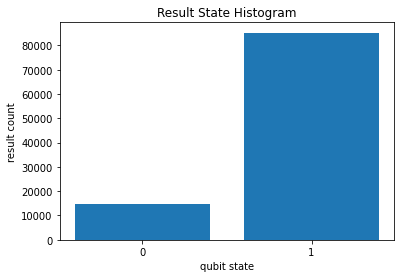

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())

> **<font color="red">We can reverse-engineer / extract the phase just from looking at the probability measures at end = Quantum Phase Estimation**

In [ ]:
result.histogram(key="a")

Counter({0: 14791, 1: 85209})

Result is around 0.14742. 

###### <font color="blue">**Mathematical Background**

> The phase estimation algorithm is used to determine the eigenvalues of a unitary operator

Computing eigenvalues has an enormous number of applications in an enormous number of fields. As such, the phase estimation algorithm is used in a large number of other quantum algorithms 

* from solving linear systems of equations in linear algebra (search for the HHL algorithm) 

* to minimizing the number of features required in machine learning applications (search for quantum principal component analysis).

<font color="gray">(Eigen- hat immer was mit Stabilitat zub tun!). Es sei eine quadratische Matrix $A$ gegeben. Die Suche nach einem Vektor $v \neq 0$ und einer Zahl $\lambda$
sodass folgende Gleichung erfüllt ist, nennt man Eigenwertproblem:

<font color="gray">>$
A \cdot v=\lambda \cdot v
$

<font color="gray">*Man wendet eine Matrix als Transformation an einen Vektor an, und dieser Vektor wird nur verlangert und verkurzt (und bleibt gleich), aber verandert nicht seine Richtung. Z.B. die Hauptachse bei einer Rotation*.

<font color="gray">* $A$ is the matrix representing some transformation
<font color="gray">* Den Faktor $\lambda$  nennt man dann den zugehörigen **Eigenwert** (reell oder komplex), 
<font color="gray">* der Vektor $v$ heißt dann **Eigenvektor** (darf nicht der Nullvektor sein). 
<font color="gray">* Die Menge der Eigenwerte einer Matrix wird als **Spektrum** der Matrix bezeichnet.

<font color="gray">**Matrix-Vector-Multiplication: $A \cdot v$ gives same result as just scaling the Eigenvector $\lambda \cdot v$.** 

<font color="gray">(Calculating via determinant: The tweaked transformation squishes space into a lower dimension. Daher muss rang < n sein)!)

Remember in **Quantum Fourier Transform**: 


> x1 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ 

* <font color="blue">$e^{2\pi i}$ = 1 = identity</font>

* In Quantum Fourier Transform we change the phase <font color="blue">$\theta$ in $e^{2\pi i}$</font> <font color="red">$^{\theta}$</font>

  * <font color="red">= Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩</font>

* Phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

* A controlled-R quantum gate applies a relative phase change to |1>. The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

**Now in Phase Estimation**: 

> In $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ dieser Teil ist die **Phase $\theta$** = $(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8})$ mit dem Operator: $U^{2^n} = \phi$

Quantum phase estimation addresses the following problem:
* We have a $n$-qubit oracle function $U$, encoded in the form of a controlled- $U$ unitary.
* **$U$ has an eigenvalue $e^{2 \pi i \phi}$, associated with an eigenvector $|u\rangle$ which we can prepare.**
* <font color="red">**We wish to estimate the phase, $\phi$, of the eigenvalue to $t$ bits of precision.**

> <font color="blue">**Given a unitary operator $U$, the algorithm estimates $\theta$ in $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$** $\quad$ (based on Eigenvalue equation)</font>

* Here $|\psi\rangle$ is an eigenvector / eigenstate and $e^{2 \pi i \theta}$ is the corresponding eigenvalue. 

* <font color="red">For example: the eigenvalues of X are −1 and 1 and have the eigenvectors |−⟩ and |+⟩ respectively.*</font>

*Since $U$ is unitary, all of its eigenvalues have a norm of 1.*

**Exkurs**:

* und $\mathrm{e}^{2 \pi \mathrm{i}}$ = 1 (identity operator)

* weil $\mathrm{e}^{\pi \mathrm{i}}$ = -1

* und: 1 + $\mathrm{e}^{\pi \mathrm{i}}$ = 0, Spezialfall der [Eulerschen Formel](https://3.141592653589793238462643383279502884197169399375105820974944592.eu/e-hoch-ipi-und-die-eulersche-identitaet/): $e^{i x}=\cos (x)+i \sin (x)$

*Die Eulersche Formel / Identität lässt sich sehr anschaulich mit Hilfe von Taylor-Reihen erklären und beweisen. Setzt man x=π in die Eulersche Formel ein, so bleibt wegen cos(π)=-1 und sin(π)=0 genau das gewünschte Resultat übrig.*



---



**Remember from Eigenvalue problem: Ax = λx in our case with the unitary operator: Ux = λx**

> $Ux =$ <font color="red">$e^{2πi*0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} }$</font> $x$

> Beispiel: Wenn $0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} = 0$, dann ist $e^{2πi*0}$ = λ = 1, so dass Ux = 1x. Damit ist λ = 1 ist der Eigenwert von f.

* Since |λ| = 1, we can write it without loss of generality as λ = $e^{2πiφ}$, where <font color="red">$e^{2πi}$ = 1 (= identity, if you insert 2*π*i into exponent at random, you will not change the result. Sometimes it can be a useful identity [Source](https://www.physicsforums.com/threads/e-2-pi-i-where-from.430393/), from Euler identity)</font> and **0 ≤ φ ≤ 1 is called the phase. This is what we want to estimate!**

* We saw that in QFT, φ being between 0 and 1 $\rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}$

> **The term “estimation” comes about not from the fact that quantum computation is probabilistic, but rather in the degree of precision that we are going to compute, or estimate, the phase to.**

* The phase φ is going to be between zero and one, so we can write it as a decimal in binary notation as follows: $φ = 0.φ_1 φ_2 ···φ_n$, where each φi is either zero or one

  * The expression $\phi=0 . \phi_{1} \phi_{2} \cdots \phi_{n}$ is equivalent to $\phi=0 . \phi_{1} \phi_{2} \cdots \phi_{n} \Longleftrightarrow \phi=\sum_{k=1}^{n} \phi_{k} 2^{-k}$. Some numbers as binary decimals: 
  
    * <font color="blue">The number 0.5 in decimal is 0.1 in binary, since 0.1 ≡ (1) · $2^{−1}$ = 1/2 = 0.5. So: $0.5_{10} = 0.1_2$. Note that 0.1 is the same as 0.100000....</font>

    * <font color="blue">The number 0.75 in decimal is 0.11 in binary, since 0.11 ≡ (1)·$2^{−1}$ +1·$2^{−2}$ = 1/2+1/4 = 3/4 = 0.75. To get this we need 2 Qubits. So we get more precision with more qubits</font>

    * 0.111 = 0.875

    * 0.1111 = 0.9375 in decimal, because: $0 \cdot 2^{0}+1 \cdot 2^{-1}+1 \cdot 2^{-2}+1 \cdot 2^{-3}+1 \cdot 2^{-4}=0 \cdot 1+1 \cdot 0.5+1 \cdot 0.25+1 \cdot 0.125+1 \cdot 0.0625=0+0.5+0.25+0.125+0.0625=0.937510$

  * Check also what is the value of the infinitely repeating binary decimal 0.1111111...
  
  * If it needed to be proved, the above exercise proves that 0 ≤ 0.φ1φ2 · · · ≤ 1

**Warum nutzt man bei QPE den Operator $U^{2^n}$?**

* $U^{2^0}$: 1 (decimal) = 00001

* $U^{2^1}$: 2 (decimal) = 00010

* $U^{2^2}$: 4 (decimal) = 00100

* $U^{2^3}$: 8 (decimal) = 01000

* $U^{2^4}$: 16 (decimal) = 10000


**So for falls die Phase 0.111 ist, wuerde bei 3 Qubits QPE berechnen:**

* $e^{2 \pi i 0. \varphi_{1} \varphi_{2} \varphi_{3}}$</font> = $e^{2 \pi i 0.(U^{2^0} + U^{2^1} + U^{2^2})}$  = <font color="red">$e^{2 \pi i 0.001 + 010 + 100)}$</font>  = $e^{2 \pi i 0.111}$

  * $2^0$ = 1 in decimal = 001 in binary

  * $2^1$ = 2 in decimal = 010 in binary

  * $2^2$ = 4 in decimal = 100 in binary

* in this case the phase $\theta$ = 0.111


**Compare that with Quantum Fourier Transform:**

* In $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ dieser Teil ist die **Phase $\theta$** = $(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8})$ 

* Let's say all $x_1, x_2$ and $x_3$ = 1 $\rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{{1}}{2}+\frac{1}{4}+\frac{1}{8}\right)}$ = $\mathrm{e}^{2 \pi \mathrm{i}(0.5+0.25+0.125)}$ and in binary form: <font color="red">$\mathrm{e}^{2 \pi \mathrm{i}(0.100+0.010+0.001)}$</font>

* **We see that in QFT and QPE it's the same (both in red)!**

<font color="red">Jedes $U^{2^n}$ wird immer dann aktiviert, wenn im Control-Qubit oben eine 1 gemessen wird (siehe Bild hier unten):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_118.png)

###### <font color="blue">**Step by Step (Mathematical)**

**QPE in Steps:** [Source](https://www.ryanlarose.com/uploads/1/1/5/8/115879647/quic03-phase-estimation.pdf)

We let U be a unitary operator and |ψ⟩ an eigenstate* (Eigenvector, Hadamard (+) is an Eigenstate) with eigenvalue $λ = e^{2πi0.φ_1}$

(*Why are we starting with an eigenstate? Doesn’t this defeat the whole purpose? After all, we could just do U|ψ⟩ and see what it’s effect was. Answer: here, we’re just using the eigenstate for pedagogical purposes. As we’ll see, the general phase estimation algorithm does not require this.)

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_117.png)

1. We first perform a Hadamard gate on the first qubit to get the state 

  * Original state of both qubits: $|0\rangle \otimes|\psi\rangle$
  
  * Hadamard on first qubit: $|+\rangle \otimes|\psi\rangle$ =
  
  * <font color="red">Distribute superposition: $|0\rangle|\psi\rangle+|1\rangle|\psi\rangle$</font>

  * <font color="blue">this part above is the rule from tensor products: If the state of the first particle is a superposition of two states, the state of the two-particle system is also a superposition: $\left(v_{1}+v_{2}\right) \otimes w=v_{1} \otimes w+v_{2} \otimes w$
</font>

    * The Hadamard states ∣+⟩ and ∣−⟩ are considered superposition states because they are a combination of the two computational states:

    * State: $|\pm\rangle=\frac{1}{\sqrt{2}}|0\rangle \pm \frac{1}{\sqrt{2}}|1\rangle$ so for + it is: $|\+\rangle=\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$

  * we have intentionally omitted the normalization factor of 1/√2 for clarity

2. We then perform a controlled U operation, which we have written as $U^{2^0}$

  * $|0\rangle|\psi\rangle+|1\rangle$ <font color="red">$U$</font> $|\psi\rangle$ =

  * $|0\rangle|\psi\rangle+$ <font color="red">$e^{2 \pi i 0. \phi_{1}}$</font> $|1\rangle|\psi\rangle$ =

  * $|0\rangle+$ <font color="red">$e^{2 \pi i 0. \phi_{1}}$</font> $|1\rangle) \otimes|\psi\rangle$

* Here are 2 things very important: 
  
    * The second qubit register containing |ψ⟩ hasn’t changed. We shouldn’t expect it to, **since |ψ⟩ is an eigenstate of U (Remember: <font color="blue">**Given a unitary operator $U$, the algorithm estimates $\theta$ in $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$ based on the Eigenvalue equation**</font>). Thus, no matter how many times we apply U to this register, nothing happens to |ψ⟩**. But if we apply it more often it will 'amplify' the phase (Not in the sense of amplitude amplification) - we amplify it with adding more qubits and hence more $\phi$ to get more precision
    
    * what’s the point of applying U then? The effect was that **it wrote some information about the eigenvalue into the relative phase of the first qubit**. Namely, the entire effect was to
map: $|0\rangle+|1\rangle \mapsto|0\rangle+e^{2 \pi i 0. \phi_{1}}|1\rangle$

3. How can we read out this information from the quantum state? Consider the effect of applying another Hadamard transformation on the first qubit (without another H we will always measure 50/50 % a 0 or 1), which will produce (ignoring the normalization factor of 1/2): 

  * $H(|0\rangle+$ <font color="red">$e^{2 \pi i 0 \cdot \phi_{1}}$</font> $|1\rangle)=$ $(1+$<font color="red">$e^{2 \pi i 0. \phi_{1}}$</font>$)|0\rangle$ + $(1-$<font color="red">$e^{2 \pi i 0 . \phi_{1}}$</font>$)|1\rangle$

  * this shares the phase with the first Qubit and allows us to read it out

  * for more than 1 Qubit we use on Quantum Phase Estimation $\frac{1}{2^{\frac{n}{2}}} \sum_{k=0}^{2^{n}-1} e^{2 \pi i \theta k}$ then the inverse Quantum Fourier transform:  <font color="red">$ \frac{1}{2^{\frac{n}{2}}} \sum_{x=0}^{2^{n}-1} e^{\frac{-2 \pi i k x}{2^{n}}}|x\rangle$</font> so that: $\frac{1}{2^{\frac{n}{2}}} \sum_{k=0}^{2^{n}-1} e^{2 \pi i \theta k}$ <font color="red">$ \frac{1}{2^{\frac{n}{2}}} \sum_{x=0}^{2^{n}-1} e^{\frac{-2 \pi i k x}{2^{n}}}|x\rangle$</font>

  * inverse QFT for 1 Qubit is: $ \frac{1}{2^{\frac{1}{2}}} \sum_{x=0}^{2^{1}-1} e^{\frac{-2 \pi i k x}{2^{1}}}|x\rangle$ = $\frac{1}{\sqrt{2}} e^{-1 \pi i k x}$ fur $k$ = $\varphi$ = 0 and $x$ = 0. --> somehting is not right here yet!

Thus, we measure with certainty (i.e., not probabilistically) a state that tells us exactly what the phase,
and hence the eigenvalue, is.

**Quantum Phase Estimation**

* algorithm for determining the eigenvalues of a unitary operator

* the [quantum phase estimation algorithm](https://en.m.wikipedia.org/wiki/Quantum_phase_estimation_algorithm) (also referred to as quantum eigenvalue estimation algorithm), is a quantum algorithm to estimate the phase (or eigenvalue) of an eigenvector of a unitary operator. 

* More precisely, given a unitary matrix $U$ and a quantum state $|\psi\rangle$ such that $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$, the algorithm estimates the value of $\theta$ with high probability within additive error $\varepsilon$, using $O(\log (1 / \varepsilon))$ qubits (without counting the ones used to encode the eigenvector state) and $O(1 / \varepsilon)$ controlled- $U$ operations. 

* The algorithm was initially introduced by Alexei Kitaev in 1995.

* Phase estimation is frequently used as a subroutine in other quantum algorithms, such as Shor's algorithm and the quantum algorithm for linear systems of equations.

Remember from phase shift R-gates (Pauli Z, S, T, etc):

> $P(\varphi)=\left[\begin{array}{ll}1 & 0 \\ 0 & e^{\varphi i}\end{array}\right]$

here 𝜑 (phi) is the phase shift (azimuth) with the period 2𝜋, so:

> $P(\varphi)=\left[\begin{array}{ll}1 & 0 \\ 0 & e^{2𝜋i}\end{array}\right]$

$\theta$ (theta) is then the other component to determine position on Bloch sphere. So that it becomes:

> $P(\varphi)=\left[\begin{array}{ll}1 & 0 \\ 0 & e^{2 \pi i \theta}\end{array}\right]$

phi: $\phi$ bzw. $\varphi$ is azimuth = phase

https://quantum-computing.ibm.com/composer/docs/iqx/guide/quantum-phase-estimation

**Zusammenhang QFT & QPE:**

Für Qubit 2 ausführliche Erläuterung, warum es dem T Gate entspricht:

> $
T|1\rangle=\left[\begin{array}{ll}
1 & 0 \\
0 & e^{\frac{i \pi}{4}}
\end{array}\right]\left[\begin{array}{l}
0 \\
1
\end{array}\right]=e^{\frac{i \pi}{4}}|1\rangle
$

Quantum Phase Estimation will give us $\theta = \frac{x}{2^n}$ where:

> $
T|1\rangle=e^{2 i \pi \theta}|1\rangle
$

We expect to find für x=1 und n=3 in der QFT formel $e^{\frac{2 \pi i 1}{8}}$):

> $
\theta=\frac{1}{8}
$

Diesen Wert sieht man oben in Qubit 2 !!

> $\theta = \frac{x}{2^n}$

fur x= 0 or 1 in a given qubit, and n=number of qubits

für: $e^{2 i \pi \theta}|1\rangle$

**Example: T-Gate**

Let's take a gate we know well, the $T$-gate, and use Quantum Phase Estimation to estimate its phase. You will remember that the $T$-gate adds a phase of $e^{\frac{i \pi}{4}}$ to the state $|1\rangle$ :

$
T|1\rangle=\left[\begin{array}{ll}
1 & 0 \\
0 & e^{\frac{i \pi}{4}}
\end{array}\right]\left[\begin{array}{l}
0 \\
1
\end{array}\right]=e^{\frac{i \pi}{4}}|1\rangle
$

Since QPE will give us $\theta$ where:

$
T|1\rangle=e^{2 i \pi \theta}|1\rangle
$

We expect to find:

$
\theta=\frac{1}{8}
$

Proof:

* $P(\varphi)=\left[\begin{array}{ll}1 & 0 \\ 0 & e^{2 \pi i \theta}\end{array}\right]$

* $e^{2 \pi i \theta}$ with $\theta=\frac{1}{8}$

* $e^{2 \pi i \frac{1}{8}}$

* $e^{\frac{\pi i}{4}}$ = $T|1\rangle$

###### **<font color="blue">Step by Step (Circuit)**

https://jonathan-hui.medium.com/qc-phase-estimation-in-shors-algorithm-acef265ebe50

https://www.youtube.com/watch?v=5kcoaanYyZw

Reminder: QFT:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_084.png)

>**See below: <font color="red">Remember that a unitary matrix has eigenvalues of the form $e^{i \theta_{\psi}}$ (ohne $2 \pi$ wie oben bei QFT) and that it has eigenvectors that form an orthonormal basis**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_083.png)

The problem: in both cases the probability is 0,5, just differs by the phase added: $=e^{\frac{i \pi}{2}}$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_078.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_079.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_080.png)

**The probability of measuring 0 and 1 is each 0,5, but there is a small factor that makes them differ from 0,5, depending on the phase (angle):**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_081.png)

Beachte: One complete turn (360°) is equal to 2π radians, so 180° is equal to π radians, or equivalently, the degree is a mathematical constant: **1° = π⁄180**.
https://en.wikipedia.org/wiki/Degree_(angle)

![ggg](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Degree_diagram.svg/440px-Degree_diagram.svg.png)

> **In the different between the probability of measuring 0 or 1, you've encoded that phase! (In other words: you've taken that phase information and turned it into and amplitude that you can measure.**

**How to do this experimentally: you do a million shots of the experiment, collect statistics and check what the statistics say. How many times did I get zero? How many times did I get one? The hope is that the difference between the statistics of zero and one would allow us to back out theta**.

**Next level: now getting more precision with more qubits:** (there is another circuit to prepare Psi yet, which is assumed to be given here)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_082.png)

writing out the calculation:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_085.png)

**Comparing QPE with QFT (QPE is the same as QFT with a different phase):**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_086.png)

It's like applying a QFT of something (of a special phase $\frac{\theta_{\psi}}{2^{n}} 2 \pi$, the green box above!), and in order to get back to the original state you need to apply an inverse QFT at the end:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_087.png)

###### **<font color="blue">Cirq Example**

**Let's take as an exmaple the T-gate, and use Quantum Phase Estimation to estimate its phase.**

You will remember that the $T$-gate adds a phase of $e^{\frac{i \pi}{4}}$ to the state $|1\rangle$ :

$
T|1\rangle=\left[\begin{array}{ll}
1 & 0 \\
0 & e^{\frac{i \pi}{4}}
\end{array}\right]\left[\begin{array}{l}
0 \\
1
\end{array}\right]=e^{\frac{i \pi}{4}}|1\rangle
$

Since QPE will give us $\theta$ where: $
T|1\rangle=e^{2 i \pi \theta}|1\rangle
$

We expect to find theta: $
\theta=\frac{1}{8}
$

<font color="blue">*(1) Set up the unitary and number of bits to use in phase estimation*

In [ ]:
# Value of θ which appears in the definition of the unitary U above.
# Try different values.
theta = 0.125

# Define the unitary U-Gate:
U = cirq.Z ** (2 * theta)

# Accuracy of the estimate for theta. Try different values.
n_bits = 3

Here details about unitary U-Gate: 

$U$ = $Z^{2^{n-n}}$ 

Z = $e^{\pi}$ 

* $Z$ entspricht $\pi$ (ein halber Kreis, zB von +1 zu -1 auf X-Achse) 


then:

> <font color="blue">$U$ = $e^{\pi * 2^{n-n}}$


<font color="blue">*(2) Build the first part of the circuit for phase estimation with controlled U-gate*

In [ ]:
# Get qubits for the phase estimation circuit.
qubits = cirq.LineQubit.range(n_bits)
u_bit = cirq.NamedQubit('u')

# Build the first part of the phase estimation circuit.
phase_estimator = cirq.Circuit(cirq.H.on_each(*qubits))

# Set the input state of the eigenvalue register: Add gate to change initial state to |1>
phase_estimator.insert(0, cirq.X(u_bit))

# bit = cirq.LineQubit
for i, bit in enumerate(qubits):
    phase_estimator.append(cirq.ControlledGate(U).on(bit, u_bit) ** (2 ** (n_bits - i - 1)))
    # explanation: U-rot control aktiviert wenn entsprechendes qubit in state 1
    # dann aktiviere formel: U^2^(n-1) ...U^2^(n-2) ...U^2^(n-n)

print(phase_estimator)

0: ───H───@───────────
          │
1: ───H───┼───@───────
          │   │
2: ───H───┼───┼───@───
          │   │   │
u: ───X───Z───S───T───


> <font color="blue">$U$ = $Z^{2^{n-n}}$ = $e^{\pi * 2^{n-n}}$ fur das erste Gate: = $e^{\pi * (-0.128)}$ ????


*Why are we adding Pauli-X? The initial state for u_bit is the  state, but the phase for this state is trivial with the operator we chose. Inserting a Pauli  operator at the begining of the circuit changes this to the  state, which has the nontrivial  phase.*

*The controlled u gate*:

$0\rangle \mapsto|00\rangle$

$|01\rangle \mapsto|01\rangle$

$|10\rangle \mapsto|1\rangle \otimes U|0\rangle=|1\rangle \otimes\left(u_{00}|0\rangle+u_{10}|1\rangle\right)$

$|11\rangle \mapsto|1\rangle \otimes U|1\rangle=|1\rangle \otimes\left(u_{01}|0\rangle+u_{11}|1\rangle\right)$

The matrix representing the controlled $U$ is

>$
\mathrm{C} U=\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}
\end{array}\right]
$

**When U is one of the Pauli operators, X,Y, Z, the respective terms "controlled-X", "controlled-Y", or "controlled-Z" are sometimes used**. 
Sometimes this is shortened to just CX, CY and CZ.

<font color="blue">*(3) Perform the inverse QFT on the estimation qubits and measure them*



In [ ]:
def make_qft_inverse(qubits):
    """Generator for the inverse QFT on a list of qubits."""
    qreg = list(qubits)[::-1]
    while len(qreg) > 0:
        q_head = qreg.pop(0)
        yield cirq.H(q_head)
        for i, qubit in enumerate(qreg):
            yield (cirq.CZ ** (-1 / 2 ** (i + 1)))(qubit, q_head)

# Do the inverse QFT
phase_estimator.append(make_qft_inverse(qubits[::-1]))

# Add measurements to the end of the circuit
phase_estimator.append(cirq.measure(*qubits, key='m'))
print(phase_estimator)

                           ┌────────┐
0: ───H───@───H───@─────────@────────────────────────M('m')───
          │       │         │                        │
1: ───H───┼───@───@^-0.5────┼──────H────@────────────M────────
          │   │             │           │            │
2: ───H───┼───┼───@─────────@^-0.25─────@^-0.5───H───M────────
          │   │   │
u: ───X───Z───S───T───────────────────────────────────────────
                           └────────┘


In [ ]:
# Syntax explanation for list(qubits)[::-1]: list[<start>:<stop>:<step>]
# So, when you do a[::-1], it starts from the end towards the first taking each element. 
# So it reverses a. This is applicable for lists/tuples as well.
# Example: >>> a = '1234' >>> a[::-1] will get you: '4321'

<font color="blue">*(4) Simulate the circuit and convert from measured bit values to estimated θ values*

In [ ]:
# Simulate the circuit.
sim = cirq.Simulator()
result = sim.run(phase_estimator, repetitions=10)

# Convert from output bitstrings to estimate θ values.
theta_estimates = np.sum(2 ** np.arange(n_bits) * result.measurements['m'], axis=1) / 2**n_bits
print(theta_estimates)

[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


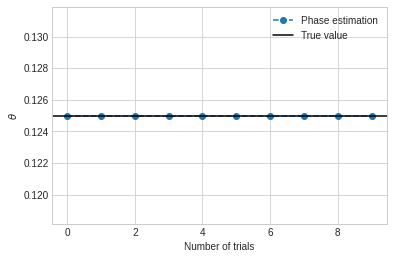

In [ ]:
"""Plot the results."""
plt.style.use("seaborn-whitegrid")

plt.plot(theta_estimates, "--o", label="Phase estimation")
plt.axhline(theta, label="True value", color="black")

plt.legend()
plt.xlabel("Number of trials")
plt.ylabel(r"$\theta$");

<font color="blue">*(5) Compute the Eigenvalues from the theta value*

Eigenvalue: $e^{2 \pi i \theta}$ is the corresponding eigenvalue, so for $\theta$ = 0.125 $\rightarrow$ $e^{2 * \pi * i * 0.125}$ = <font color="blue">0.707106781 + 0.707106781 i (Eigenvalue of T-gate)</font>

* Verification: $
T|1\rangle=\left[\begin{array}{ll}
1 & 0 \\
0 & e^{\frac{i \pi}{4}}
\end{array}\right]\left[\begin{array}{l}
0 \\
1
\end{array}\right]=e^{\frac{i \pi}{4}}|1\rangle
$ $\rightarrow$ <font color="blue">$e^{\frac{i \pi}{4}}$ is the same as $e^{2 * \pi * i * 0.125}$ bzw. $e^{\frac{2 * \pi * i}{8}}$</font>

* $e^{2 \pi i 0. \varphi_{1} \varphi_{2} \varphi_{3}}$</font> = $e^{2 \pi i 0.(U^{2^0} + U^{2^1} + U^{2^2})}$  = <font color="red">$e^{2 \pi i 0.001 + 010 + 100)}$</font>  = $e^{2 \pi i 0.111}$

* ps: $e^{2 \pi i}$ =  1 (identity) - ohne theta, die phase

* From Eigenvalue euqation: $Ux =$ <font color="red">$e^{2πi*0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} }$</font> $x$. Beispiel: Wenn $0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} = 0$, dann ist $e^{2πi*0}$ = λ = 1, so dass Ux = 1x. Damit ist λ = 1 ist der Eigenwert von f.

* https://quantumcomputing.stackexchange.com/questions/9577/how-to-find-eigenvalues-and-eigenvector-for-a-quantum-gate


https://www.youtube.com/watch?v=YpcT8u2a2jc&list=PLOFEBzvs-VvrXTMy5Y2IqmSaUjfnhvBHR

https://arxiv.org/pdf/1910.11696.pdf

https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html#creating_the_circuit

![gg](https://upload.wikimedia.org/wikipedia/commons/a/a5/PhaseCircuit-crop.svg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_115.png)

###### **Here is a solution that just consists of what we did in previous cells all put together.**

In [ ]:
def phase_estimation(theta, n_bits, n_reps=10, prepare_eigenstate_gate=cirq.X):
    # Define qubit registers.
    qubits = cirq.LineQubit.range(n_bits)
    u_bit = cirq.NamedQubit('u')

    # Define the unitary U.
    U = cirq.Z ** (2 * theta)

    # Start with Hadamards on every qubit.
    phase_estimator = cirq.Circuit(cirq.H.on_each(*qubits))

    # Do the controlled powers of the unitary U.
    for i, bit in enumerate(qubits):
        phase_estimator.append(cirq.ControlledGate(U).on(bit, u_bit) ** (2 ** (n_bits - 1 - i)))

    # Do the inverse QFT.
    phase_estimator.append(make_qft_inverse(qubits[::-1]))

    # Add measurements.
    phase_estimator.append(cirq.measure(*qubits, key='m'))

    # Gate to choose initial state for the u_bit. Placing X here chooses the |1> state.
    phase_estimator.insert(0, prepare_eigenstate_gate.on(u_bit))

    # Code to simulate measurements
    sim = cirq.Simulator()
    result = sim.run(phase_estimator, repetitions=n_reps)

    # Convert measurements into estimates of theta
    theta_estimates = np.sum(2**np.arange(n_bits)*result.measurements['m'], axis=1)/2**n_bits

    return theta_estimates

In [ ]:
"""Analyze convergence vs n_bits."""
# Set the value of theta. Try different values.
theta = 0.123456

max_nvals = 16
nvals = np.arange(1, max_nvals, step=1)

# Get the estimates at each value of n.
estimates = []
for n in nvals:
    estimate = phase_estimation(theta=theta, n_bits=n, n_reps=1)[0]
    estimates.append(estimate)

In [ ]:
print(theta_estimates)

[0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.125]


In [ ]:
print(estimates)

[0.0, 0.0, 0.125, 0.125, 0.125, 0.125, 0.125, 0.16015625, 0.123046875, 0.123046875, 0.12353515625, 0.121337890625, 0.1234130859375, 0.12347412109375, 0.123443603515625]


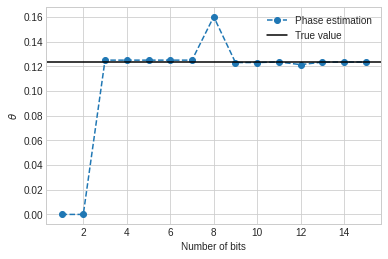

In [ ]:
"""Plot the results."""
plt.style.use("seaborn-whitegrid")

plt.plot(nvals, estimates, "--o", label="Phase estimation")
plt.axhline(theta, label="True value", color="black")

plt.legend()
plt.xlabel("Number of bits")
plt.ylabel(r"$\theta$");